In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
csv_file_path_test = 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/RFMiD_Testing_Labels.csv'

# Now you can use pd.read_csv() to read the file
csv_file_path_test_df = pd.read_csv(csv_file_path_test)

# Now you can use the .head() method
print(csv_file_path_test_df.head())

   ID  Disease_Risk  DR  ARMD  MH  DN  MYA  BRVO  TSLN  ERM  ...  CME  PTCR  \
0   1             1   1     0   0   0    0     0     1    0  ...    0     0   
1   2             1   1     0   0   0    0     1     0    0  ...    0     0   
2   3             1   1     0   0   0    0     0     0    0  ...    0     0   
3   4             1   0     0   0   0    0     0     0    0  ...    0     0   
4   5             1   0     0   0   0    0     0     0    0  ...    0     0   

   CF  VH  MCA  VS  BRAO  PLQ  HPED  CL  
0   0   0    0   0     0    0     0   0  
1   0   0    0   0     0    0     0   0  
2   0   0    0   0     0    0     0   0  
3   0   0    0   0     0    0     0   0  
4   0   0    0   0     0    0     0   0  

[5 rows x 47 columns]


In [4]:
image_folder_path = '"E:\6th\ai\dataset\ratinal disease\archive\Test_Set\Test_Set\Test"'
image_size = (224, 224)

In [5]:
len(image_folder_path)

62

In [6]:
import os
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf



def load_images_and_labels(image_folder, metadata):
    images = []
    labels = []
    for index, row in metadata.iterrows():  # Assuming 'metadata' is a DataFrame
        image_path = os.path.join(image_folder, str(row['ID']))  # Assuming 'ID' is the column containing image filenames
        print("Attempting to read image at path:", image_path)
        try:
            image = Image.open(image_path)
            image = np.array(image)  # Convert PIL Image to numpy array
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR (OpenCV's default)
            image = cv2.resize(image, image_size)
            images.append(image)
            labels.append(row['DiseaseRisk'])  # Assuming 'DiseaseRisk' is the column containing disease risk labels
        except Exception as e:
            print(f"Failed to read image at path: {image_path}")
            print("Error:", e)
            continue  # Skip this image and proceed with the next one
    
    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Create a TensorFlow dataset from the numpy arrays
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    return dataset

# Define the paths and parameters
image_folder_path = "E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test"
csv_file_path_test_df = 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/RFMiD_Testing_Labels.csv'
image_size = (224, 224)
metadata_df = pd.read_csv(csv_file_path_test_df)

# Load the dataset
dataset = load_images_and_labels(image_folder_path, metadata_df)

# Iterate over the dataset
for images, labels in dataset.take(1):
    print(images.shape)  # Shape of the batch of images
    print(labels.numpy())


Attempting to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\1
Failed to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\1
Error: [Errno 2] No such file or directory: 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\\1'
Attempting to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\2
Failed to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\2
Error: [Errno 2] No such file or directory: 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\\2'
Attempting to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\3
Failed to read image at path: E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\3
Error: [Errno 2] No such file or directory: 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test\\3'
Attempting to read image at path: E:/6th/ai/dataset/ratinal dise

In [13]:
from PIL import Image
import numpy as np

# Function to load images using Pillow and convert to numpy arrays
def load_images(image_folder, metadata):
    images_test = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_folder, str(row['ID']) + '.png')  # Assuming 'ID' is the column containing image filenames
        try:
            image = Image.open(image_path)
            image = image.resize(image_size)  # Resize the image if needed
            image_np = np.array(image)  # Convert PIL Image to numpy array
            images_test.append(image_np)
        except Exception as e:
            print(f"Error reading image at path {image_path}: {e}")
    return np.array(images_test)

# Define the paths and parameters
image_folder_path = "E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/Test"
csv_file_path_test_df = 'E:/6th/ai/dataset/ratinal disease/archive/Test_Set/Test_Set/RFMiD_Testing_Labels.csv'
image_size = (224, 224)
metadata_df_test = pd.read_csv(csv_file_path_test_df)

# Call the function to load images
images_test = load_images(image_folder_path, metadata_df_test)

# Print the shape of the images array

print(images_test[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [14]:
print(metadata_df_test.columns)


Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')


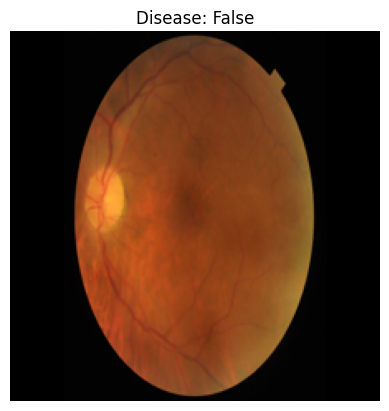

In [15]:
import matplotlib.pyplot as plt

# Display the first image
disease_risk = metadata_df_test.loc[272, 'Disease_Risk']

# Define the title based on the DiseaseRisk value
title = 'Disease: True' if disease_risk == 1 else 'Disease: False'

# Display the first image with the appropriate title
plt.imshow(images_test[272])
plt.title(title)
plt.axis('off')  # Hide axis
plt.show()

In [18]:
from PIL import Image
import numpy as np

# Function to load images using Pillow and convert to numpy arrays
def load_images_val(image_folder, metadata):
    images_val = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_folder, str(row['ID']) + '.png')  # Assuming 'ID' is the column containing image filenames
        try:
            image = Image.open(image_path)
            image = image.resize(image_size)  # Resize the image if needed
            image_np = np.array(image)  # Convert PIL Image to numpy array
            images_val.append(image_np)
        except Exception as e:
            print(f"Error reading image at path {image_path}: {e}")
    return np.array(images_val)


# Define the paths and parameters
image_folder_val = "E:/6th/ai/dataset/ratinal disease/archive/Evaluation_Set/Evaluation_Set/Validation"
csv_file_path_val_df = "E:/6th/ai/dataset/ratinal disease/archive/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv"

image_size = (224, 224)
metadata_df_val = pd.read_csv(csv_file_path_val_df)

# Call the function to load images
images_val = load_images_val(image_folder_val, metadata_df_val)

# Print the shape of the images array

print(images_val[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [19]:
from PIL import Image
import numpy as np

# Function to load images using Pillow and convert to numpy arrays
def load_images_train(image_folder, metadata):
    images_train = []
    for index, row in metadata.iterrows():
        image_path = os.path.join(image_folder, str(row['ID']) + '.png')  # Assuming 'ID' is the column containing image filenames
        try:
            image = Image.open(image_path)
            image = image.resize(image_size)  # Resize the image if needed
            image_np = np.array(image)  # Convert PIL Image to numpy array
            images_train.append(image_np)
        except Exception as e:
            print(f"Error reading image at path {image_path}: {e}")
    return np.array(images_train)


# Define the paths and parameters
csv_file_path_train_df = r"E:\6th\ai\dataset\ratinal disease\archive\Training_Set\Training_Set\RFMiD_Training_Labels.csv"
image_folder_train = r"E:\6th\ai\dataset\ratinal disease\archive\Training_Set\Training_Set\Training"


image_size = (224, 224)
metadata_df_train = pd.read_csv(csv_file_path_train_df)

# Call the function to load images
images_train = load_images_train(image_folder_train, metadata_df_train)

# Print the shape of the images array

print(images_train[0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [44]:
len(images_train)
labels_train = metadata_df_train['Disease_Risk'].values

In [21]:
len(images_val)

640

In [32]:
val_ds=images_val[:240]
print(len(val_ds))

labels_val = metadata_df_val['Disease_Risk'].values


240


In [31]:
print(metadata_df_val.columns)


Index(['ID', 'Disease_Risk', 'DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN',
       'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST',
       'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS',
       'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF',
       'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL'],
      dtype='object')


In [22]:
len(images_test)

640

In [45]:
test_ds=images_test[:240]
print(len(test_ds))
labels_test = metadata_df_test['Disease_Risk'].values

240


In [28]:
import tensorflow as tf

# Function to preprocess images using TensorFlow preprocessing layers
def preprocess_images(images):
    # Convert images to TensorFlow tensors
    images = tf.convert_to_tensor(images)
    
    # Resize images to a fixed size (e.g., 224x224)
    resized_images = tf.image.resize(images, (224, 224))
    
    # Normalize pixel values to range [0, 1]
    normalized_images = resized_images / 255.0
    
    return normalized_images

# Preprocess training images
preprocessed_images_train = preprocess_images(images_train)

# Preprocess validation images
preprocessed_images_val = preprocess_images(images_val)

# Preprocess test images
preprocessed_images_test = preprocess_images(images_test)
#######################################not use argument

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
def build_model(input_shape):
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        # Dense layers
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

# Build the model
model = build_model(input_shape=(224, 224, 3))

In [41]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(preprocessed_images_train, labels_train, epochs=10, batch_size=32, validation_data=(preprocessed_images_val, labels_val))

Epoch 1/10


60/60 [==============================] - 36s 550ms/step - loss: 0.4839 - accuracy: 0.7995 - val_loss: 0.4447 - val_accuracy: 0.8172
Epoch 2/10
60/60 [==============================] - 34s 563ms/step - loss: 0.4604 - accuracy: 0.8203 - val_loss: 0.5087 - val_accuracy: 0.8141
Epoch 3/10
60/60 [==============================] - 39s 651ms/step - loss: 0.4571 - accuracy: 0.8203 - val_loss: 0.4735 - val_accuracy: 0.8172
Epoch 4/10
60/60 [==============================] - 43s 716ms/step - loss: 0.4363 - accuracy: 0.8245 - val_loss: 0.4735 - val_accuracy: 0.8172
Epoch 5/10
60/60 [==============================] - 43s 715ms/step - loss: 0.4512 - accuracy: 0.8182 - val_loss: 0.4540 - val_accuracy: 0.8172
Epoch 6/10
60/60 [==============================] - 43s 713ms/step - loss: 0.4284 - accuracy: 0.8219 - val_loss: 0.4338 - val_accuracy: 0.8172
Epoch 7/10
60/60 [==============================] - 43s 711ms/step - loss: 0.4414 - accuracy: 0.8240 - val_loss: 0.4963 - val_accuracy: 0.81

In [47]:
test_loss, test_accuracy = model.evaluate(preprocessed_images_test, labels_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

20/20 [==============================] - 3s 130ms/step - loss: 0.4329 - accuracy: 0.8422
Test Loss: 0.43293318152427673
Test Accuracy: 0.8421875238418579


In [48]:
history
